SINGLE TASK XG BOOST

In [1]:
import xgboost as xgb

# Load data
dtrain = xgb.DMatrix('train.data')
dval = xgb.DMatrix('val.data')

# Specify parameters
params = {
    'max_depth': 9,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    "min_child_weight": 1,
    "gamma": 0.48,
    "subsample": 1,
    "colsample_bytree": 0.7,
    "nthread": 8,
    "scale_pos_weight": 1,
    
}

# Specify validation set for early stopping
eval_list = [(dval, 'eval'), (dtrain, 'train')]

# Train model
num_round = 1000  # Number of training rounds
bst = xgb.train(params, dtrain, num_round, eval_list, early_stopping_rounds=100)


/home/user/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-auc:0.65180	train-auc:0.95232
[1]	eval-auc:0.66375	train-auc:0.97682
[2]	eval-auc:0.66174	train-auc:0.99122
[3]	eval-auc:0.66822	train-auc:0.99533
[4]	eval-auc:0.67742	train-auc:0.99695
[5]	eval-auc:0.67726	train-auc:0.99909
[6]	eval-auc:0.69030	train-auc:0.99978
[7]	eval-auc:0.69792	train-auc:0.99994
[8]	eval-auc:0.69460	train-auc:0.99998
[9]	eval-auc:0.69179	train-auc:0.99999
[10]	eval-auc:0.69443	train-auc:1.00000
[11]	eval-auc:0.69462	train-auc:1.00000
[12]	eval-auc:0.69370	train-auc:1.00000
[13]	eval-auc:0.69786	train-auc:1.00000
[14]	eval-auc:0.70439	train-auc:1.00000
[15]	eval-auc:0.70515	train-auc:1.00000
[16]	eval-auc:0.70236	train-auc:1.00000
[17]	eval-auc:0.70388	train-auc:1.00000
[18]	eval-auc:0.70537	train-auc:1.00000
[19]	eval-auc:0.70464	train-auc:1.00000
[20]	eval-auc:0.70544	train-auc:1.00000
[21]	eval-auc:0.70795	train-auc:1.00000
[22]	eval-auc:0.71003	train-auc:1.00000
[23]	eval-auc:0.71116	train-auc:1.00000
[24]	eval-auc:0.71112	train-auc:1.00000
[25]	eval-

AUC: 0.7172106608251186
F1 Score: 0.6751361161524501


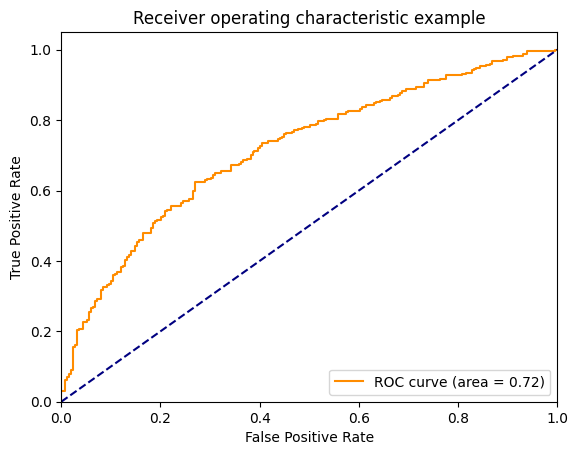

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np

# Assume your validation labels are in a 1-D numpy array named y_val
# y_val = np.array([...])

# predict probabilities

y_pred_proba = bst.predict(dval)
# Convert predicted probabilities to class labels
y_pred_labels = (y_pred_proba > 0.5).astype(int)
# Get true labels from dval
y_val = dval.get_label()

# Calculate F1 score
f1 = f1_score(y_val, y_pred_labels)


# calculate AUC
y_val = dval.get_label()
auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC: {auc}")
print(f"F1 Score: {f1}")

# To plot ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

With Leave One Group Out Cross Validation

In [3]:
from sklearn.datasets import load_svmlight_file
import numpy as np

# load libsvm format data
X, y = load_svmlight_file('all.data')

# Convert to dense array for easier indexing
X = X.toarray()

# Extract groups
groups = X[:, 0]

In [4]:
for x in groups:
    print(x)

5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0


In [5]:
X

array([[5., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 1., 0., ..., 0., 0., 0.],
       [5., 1., 0., ..., 0., 0., 0.],
       [5., 1., 0., ..., 0., 0., 0.]])

In [6]:
import xgboost as xgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

logo = LeaveOneGroupOut()

auc_scores = []
f1_scores = []

params = {
    'max_depth': 9,
    'eta': 0.03,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    "min_child_weight": 1,
    "gamma": 0.48,
    "subsample": 1,
    "colsample_bytree": 0.7,
    "nthread": 8,
    "scale_pos_weight": 1,
}

for train_index, test_index in logo.split(X, y, groups):
    dtrain = xgb.DMatrix(X[train_index], label=y[train_index])
    dtest = xgb.DMatrix(X[test_index], label=y[test_index])

    bst = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dtest, 'eval')], early_stopping_rounds=100)

    # predict probabilities
    y_pred_proba = bst.predict(dtest)
    # Convert predicted probabilities to class labels
    y_pred_labels = (y_pred_proba > 0.5).astype(int)

    # Calculate AUC
    auc = roc_auc_score(y[test_index], y_pred_proba)
    auc_scores.append(auc)
    
    # Calculate F1 score
    f1 = f1_score(y[test_index], y_pred_labels)
    f1_scores.append(f1)
    
# Average AUC and F1 scores across all groups
avg_auc = np.mean(auc_scores)
avg_f1 = np.mean(f1_scores)

print(f"Avg AUC: {avg_auc}")
print(f"Avg F1 Score: {avg_f1}")

[0]	eval-auc:0.44367
[1]	eval-auc:0.45395
[2]	eval-auc:0.45306
[3]	eval-auc:0.46848
[4]	eval-auc:0.48537
[5]	eval-auc:0.49343
[6]	eval-auc:0.48537
[7]	eval-auc:0.49122
[8]	eval-auc:0.48283
[9]	eval-auc:0.48384
[10]	eval-auc:0.47008
[11]	eval-auc:0.47057
[12]	eval-auc:0.46992
[13]	eval-auc:0.46693
[14]	eval-auc:0.46584
[15]	eval-auc:0.46292
[16]	eval-auc:0.45531
[17]	eval-auc:0.45035
[18]	eval-auc:0.45233
[19]	eval-auc:0.45057
[20]	eval-auc:0.44892
[21]	eval-auc:0.46135
[22]	eval-auc:0.45909
[23]	eval-auc:0.46093
[24]	eval-auc:0.46413
[25]	eval-auc:0.46791
[26]	eval-auc:0.46647
[27]	eval-auc:0.46741
[28]	eval-auc:0.46449
[29]	eval-auc:0.46690
[30]	eval-auc:0.46574
[31]	eval-auc:0.46467
[32]	eval-auc:0.46042
[33]	eval-auc:0.46164
[34]	eval-auc:0.46001
[35]	eval-auc:0.46131
[36]	eval-auc:0.46001
[37]	eval-auc:0.45458
[38]	eval-auc:0.45351
[39]	eval-auc:0.45086
[40]	eval-auc:0.44967
[41]	eval-auc:0.45510
[42]	eval-auc:0.45312
[43]	eval-auc:0.45191
[44]	eval-auc:0.44992
[45]	eval-auc:0.4491

[165]	eval-auc:0.53065
[166]	eval-auc:0.53017
[167]	eval-auc:0.52921
[168]	eval-auc:0.53352
[169]	eval-auc:0.53688
[170]	eval-auc:0.53352
[171]	eval-auc:0.53017
[172]	eval-auc:0.52921
[173]	eval-auc:0.52730
[174]	eval-auc:0.52682
[175]	eval-auc:0.53161
[176]	eval-auc:0.53352
[177]	eval-auc:0.53688
[178]	eval-auc:0.53879
[179]	eval-auc:0.53496
[180]	eval-auc:0.53784
[181]	eval-auc:0.53975
[0]	eval-auc:0.51811
[1]	eval-auc:0.51171
[2]	eval-auc:0.53727
[3]	eval-auc:0.53892
[4]	eval-auc:0.53970
[5]	eval-auc:0.54775
[6]	eval-auc:0.54471
[7]	eval-auc:0.53347
[8]	eval-auc:0.52293
[9]	eval-auc:0.51590
[10]	eval-auc:0.51239
[11]	eval-auc:0.50273
[12]	eval-auc:0.50657
[13]	eval-auc:0.51690
[14]	eval-auc:0.52482
[15]	eval-auc:0.52853
[16]	eval-auc:0.54497
[17]	eval-auc:0.54964
[18]	eval-auc:0.54517
[19]	eval-auc:0.53662
[20]	eval-auc:0.55415
[21]	eval-auc:0.55315
[22]	eval-auc:0.54608
[23]	eval-auc:0.53710
[24]	eval-auc:0.53788
[25]	eval-auc:0.53456
[26]	eval-auc:0.53671
[27]	eval-auc:0.54499
[28

[209]	eval-auc:0.54569
[210]	eval-auc:0.54573
[211]	eval-auc:0.54610
[212]	eval-auc:0.54626
[213]	eval-auc:0.54571
[214]	eval-auc:0.54624
[215]	eval-auc:0.54723
[216]	eval-auc:0.54780
[217]	eval-auc:0.54792
[218]	eval-auc:0.54757
[219]	eval-auc:0.54829
[220]	eval-auc:0.54916
[221]	eval-auc:0.54916
[222]	eval-auc:0.54920
[223]	eval-auc:0.54950
[224]	eval-auc:0.55077
[225]	eval-auc:0.55178
[226]	eval-auc:0.55056
[227]	eval-auc:0.54983
[228]	eval-auc:0.54978
[229]	eval-auc:0.55033
[230]	eval-auc:0.55008
[231]	eval-auc:0.55031
[232]	eval-auc:0.54948
[233]	eval-auc:0.54902
[234]	eval-auc:0.54916
[235]	eval-auc:0.54918
[236]	eval-auc:0.54911
[237]	eval-auc:0.54833
[238]	eval-auc:0.54861
[239]	eval-auc:0.55012
[240]	eval-auc:0.54969
[241]	eval-auc:0.54948
[242]	eval-auc:0.54930
[243]	eval-auc:0.54950
[244]	eval-auc:0.54980
[245]	eval-auc:0.54996
[246]	eval-auc:0.55084
[247]	eval-auc:0.55141
[248]	eval-auc:0.54994
[249]	eval-auc:0.55017
[250]	eval-auc:0.55063
[251]	eval-auc:0.55123
[252]	eval-

[192]	eval-auc:0.57389
[193]	eval-auc:0.57487
[194]	eval-auc:0.57528
[195]	eval-auc:0.57463
[196]	eval-auc:0.57292
[197]	eval-auc:0.57121
[198]	eval-auc:0.57194
[199]	eval-auc:0.57218
[200]	eval-auc:0.57316
[201]	eval-auc:0.57243
[202]	eval-auc:0.57210
[203]	eval-auc:0.57072
[204]	eval-auc:0.57210
[205]	eval-auc:0.57145
[206]	eval-auc:0.57015
[207]	eval-auc:0.56966
[208]	eval-auc:0.56852
[209]	eval-auc:0.56925
[210]	eval-auc:0.56958
[211]	eval-auc:0.57015
[212]	eval-auc:0.57007
[213]	eval-auc:0.57096
[214]	eval-auc:0.57064
[215]	eval-auc:0.56999
[216]	eval-auc:0.56966
[217]	eval-auc:0.56893
[218]	eval-auc:0.56917
[0]	eval-auc:0.47348
[1]	eval-auc:0.47553
[2]	eval-auc:0.49845
[3]	eval-auc:0.50220
[4]	eval-auc:0.51703
[5]	eval-auc:0.52897
[6]	eval-auc:0.53048
[7]	eval-auc:0.53535
[8]	eval-auc:0.52988
[9]	eval-auc:0.52935
[10]	eval-auc:0.53576
[11]	eval-auc:0.53636
[12]	eval-auc:0.53384
[13]	eval-auc:0.53855
[14]	eval-auc:0.53328
[15]	eval-auc:0.53495
[16]	eval-auc:0.53179
[17]	eval-auc:0

In [7]:
print(f"Avg AUC: {avg_auc}")
print(f"Avg F1 Score: {avg_f1}")

Avg AUC: 0.5182034328386736
Avg F1 Score: 0.5465463282059778
